# Homework 1

In [3]:
pip install graphviz

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/cmsc691_fa24/HW1/IF-Class-HW1/CIS-7000/HW1

/content/drive/MyDrive/Colab Notebooks/cmsc691_fa24/HW1/IF-Class-HW1/CIS-7000/HW1


## Action Castle

For the first homework, we'll implement a more complicated game based on __Action Castle__, a game in the awesome book
[Parsley](http://www.memento-mori.com/parsely-products/parsely-pdf)  by Jared A. Sorensen.

Here's a map of Action Castle.

![image.png](attachment:image.png)

### Import Text Adventures

In [47]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [68]:

frodo_house = things.Location(
    "Frodo's Home",
    "You are standing in your Home."
)
shire = things.Location(
    "The Shire",
    "You are standing in a peaceful valley of the hobbits. This is where your house is.",
)
rivendell = things.Location(
    "Rivendell",
    "You are standing in a Elven refugee valley."
)
rohan = things.Location(
    "Rohan",
    "You are standing in the kingdom of horsemen. Theoden the King of Rohan lives here.",
)
isngard = things.Location(
    "Isngard",
    "You have arrived to Isngard. There is a Fortress here.",
)
lothlorien= things.Location(
    "Lothlorien",
    "You are standing in Lothlorien. This is where Galadriel visits"
)
courtyard = things.Location(
    "Courtyard",
    "You are in the courtyard of Lothlorien."
)
tower_stairs = things.Location(
    "Tower Stairs",
    "You are climbing the stairs to the tower. There is a locked door here.",
)
tower = things.Location(
    "Tower",
    "You are inside a tower."
)
dungeon_stairs = things.Location(
    "Dungeon Stairs",
    "You are climbing the stairs down to the dungeon."
)
dungeon = things.Location(
    "Dungeon",
    "You are in the dungeon. There is a hidden figure here."
)
barad_dur_throne_room = things.Location(
    "Sauron Throne Room",
    "This is the throne room of the dark lord Sauron."
)
fortress = things.Location(
    "Fortress",
    "You are in the Fortress. There is a door here."
)
fortress_stairs = things.Location(
    "Fortress Stairs",
    "You are climbing the stairs to the Fortress.",
)
miskwood = things.Location(
    "Miskwood",
    "You are in the Miskwoods. Two friends reside here Legoles."
)
mordor = things.Location(
    "Mordor",
    "You stand inside Morder. Mount Doom and Barad-dur is ahead."
)
mount_doom_stairs = things.Location(
    "Mount Doom Stairs",
    "You are climbing the stairs into the opening of Mount Doom. There is a river of lava below you."
)
barad_dur = things.Location(
    "Barad Dur Doom",
    "You are in Sauron's fortress. There is a door ahead or venture to Mount Doom."

)
cliff_mount_doom = things.Location(
    "cliff of Mount Doom",
    "You stand on the cliff of Mount Doom. There is a laval pit here."
)
death = things.Location(
    "The Afterlife",
    "You are dead. GAME OVER."
)
death.set_property("game_over", True)


# Map of Locations
frodo_house.add_connection("out", shire)
shire.add_connection("south", rivendell)
rivendell.add_connection("west", rohan)
rohan.add_connection("north", isngard)
isngard.add_connection("up", fortress_stairs)
fortress_stairs.add_connection("up", fortress)
rivendell.add_connection("east", miskwood)
miskwood.add_connection("south", mordor)
mordor.add_connection("up", mount_doom_stairs)
mount_doom_stairs.add_connection("up", cliff_mount_doom)
miskwood.add_connection("north", lothlorien)
cliff_mount_doom.add_connection("jump", death)
lothlorien.add_connection("east", courtyard)
courtyard.add_connection("up", tower_stairs)
courtyard.add_connection("down", dungeon_stairs)
mordor.add_connection("east", barad_dur)
tower_stairs.add_connection("up", tower)
dungeon_stairs.add_connection("down", dungeon)
barad_dur.add_connection("east", barad_dur_throne_room)

###  Preliminary Game Map

Here is a visualization of the locations in action castle represented as a directed graph.

![Visualization of game map starting from the tower](../map-from-tower.svg)

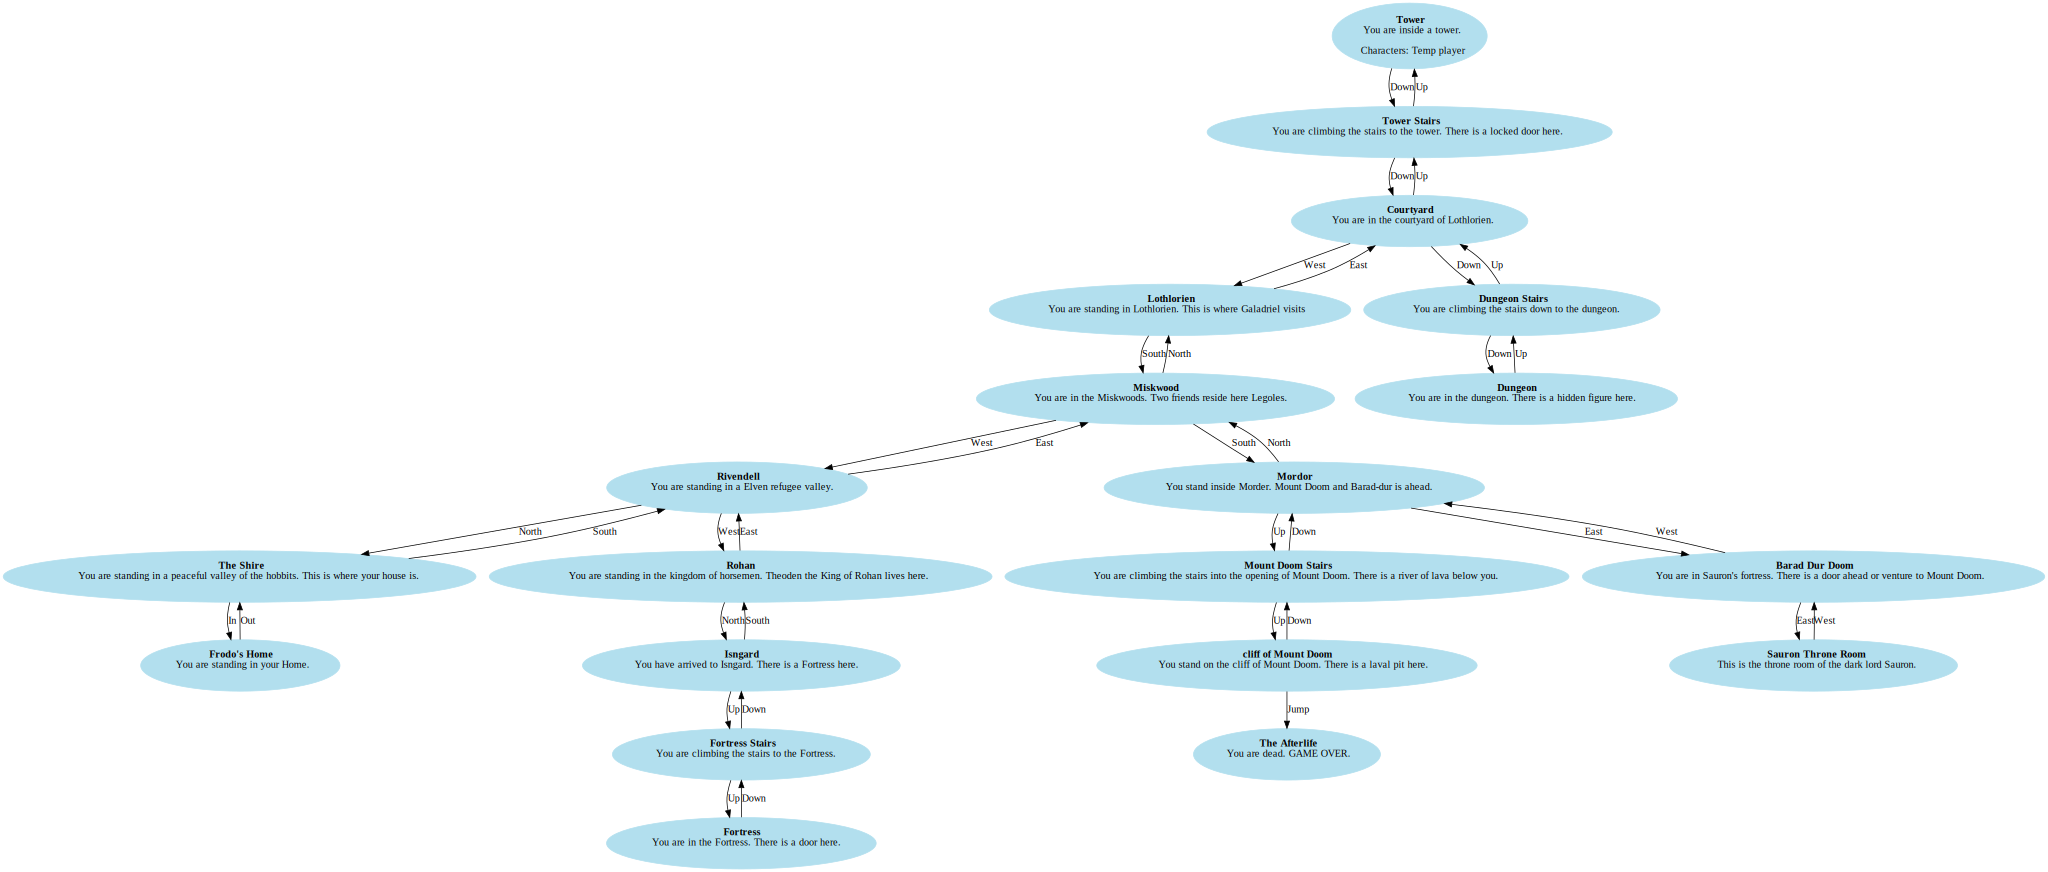

In [69]:
tempgame = games.Game(tower, things.Character(name="Temp Player", description="", persona=""))

from text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

## Items

### Gettable Items

In [70]:
# Put a fishing pole at the cottage
fishing_pole = things.Item(
    "pole",
    "a fishing pole",
    "A SIMPLE FISHING POLE.",
)
frodo_house.add_item(fishing_pole)


# Put a magical Elvish dagger in the house of frodo that could be used as a weapon
elvish_dagger = things.Item(
    "Elvish dagger",
    "a magic Elvish dagger, bright and power.",
    "IT LOOKS LIKE A MAGICAL Elvish dagger, FORGED BY EVLVES.",
)
elvish_dagger.set_property("is_weapon", True)
elvish_dagger.set_property("is_fragile", True)
cliff_mount_doom.add_item(elvish_dagger)


# Put a candle in the feasting hall
phial_galadriel = things.Item(
    "Phial of Galadriel",
    "a strange magical light",
    "THE MAGICAL LIGHT IS GLOWING IN THE STAR GLASS .",
)
phial_galadriel.set_property("is_lightable", True)
phial_galadriel.set_property("is_lit", False)
phial_galadriel.add_command_hint("light star glass")
phial_galadriel.add_command_hint("shake phial")
barad_dur.add_item(phial_galadriel)


In [71]:
# Put an actual pond at the fishing location
pond = things.Item(
    "pond",
    "a small fishing pond",
    "THERE ARE FISH IN THE POND.",
)
pond.set_property("gettable", False)
pond.set_property("has_fish", True)
pond.add_command_hint("catch fish")
pond.add_command_hint("catch fish with pole")
rivendell.add_item(pond)


# A nice rosebush for the garden path
rosebush = things.Item(
    "rosebush",
    "a rosebush",
    "THE ROSEBUSH CONTAINS A SINGLE RED ROSE.  IT IS BEAUTIFUL.",
)
rosebush.set_property("gettable", False)
rosebush.set_property("has_rose", True)
rosebush.add_command_hint("pick rose")
shire.add_item(rosebush)


# Throne room wouldn't be that impressive without a throne
throne = things.Item(
    "throne",
    "An ornate golden throne."
)
throne.set_property("gettable", False)
throne.add_command_hint("sit on throne")
barad_dur_throne_room.add_item(throne)


# A door that leads to the tower stairs
door = things.Item(
    "door",
    "a door",
    "THE DOOR IS SECURELY LOCKED."
)
door.set_property("gettable", False)
door.set_property("is_locked", True)
door.add_command_hint("unlock door")
tower_stairs.add_item(door)


## Characters

In [72]:
# Player
player = things.Character(
    name="Frodo",
    description="You are a simple Hobbit destined for greatness.",
    persona="I am on an adventure to save Middle Earth.",
)

# Player's lamp
lamp = things.Item("lamp", "a lamp", "A LAMself.")
lamp.set_property("is_lightable", True)
lamp.set_property("is_lit", False)
lamp.add_command_hint("light lamp")
player.add_to_inventory(lamp)


### Non-Player Characters (NPCs)

In [73]:
# A Troll at the drawbridge
troll = things.Character(
    name="troll",
    description="A mean troll",
    persona="I am hungry. The guard promised to feed me if I guard the drawbridge and keep people out of the castle.",
)
troll.set_property("is_hungry", True)
troll.set_property("character_type", "troll")
lothlorien.add_character(troll)


# A guard in the courtyard
orc = things.Character(
    name="Orc",
    description="A castle orc guard",
    persona="I am suspicious of anyone trying to enter the castle. I will prevent keep people from entering and learning the dark lords castle dark secret.",
)
orc.set_property("is_conscious", True)
orc.set_property("is_suspicious", True)
orc.set_property("character_type", "troll")
courtyard.add_character(orc)

# Orc Guard has a key
key = things.Item("key", "a brass key", "THIS LOOKS USEFUL")
orc.add_to_inventory(key)

# Orc Guard has a sword
sword = things.Item("sword", "a short sword", "A SHARP SHORT SWORD.")
sword.set_property("is_weapon", True)
orc.add_to_inventory(sword)


# A Princess in the tower
galadriel = things.Character(
    name="galadriel",
    description="A Leader of the Sylcan elves.",
    persona="I am the leader of the Sylvan elves. I offers spiritual aid, counsel and encouragment during the dark moments of your quest.",
)
galadriel.set_property("is_royal", True)
galadriel.set_property("emotional_state", "sad and lonely")
galadriel.set_property("is_married", False)
galadriel.set_property("character_type", "human")
tower.add_character(galadriel)


# A ghost in the dungeon
gollum = things.Character(
    name="Gollum",
    description="Gollum, the darker, treacherous side, and Smeagol , claw-like fingers and who is wearing the ring of power.",
    persona="I will murder anyone that trys to take my precious.",
)
gollum.set_property("character_type", "ghost")
gollum.set_property("is_dead", True)
gollum.set_property("is_banished", False)
dungeon.add_character(gollum)

# ring of power
ring = things.Item("ring", "ring of power", "A POWERFUL RTNG FIT FOR A KING.")
ring.add_command_hint("wear ring of power")
gollum.add_to_inventory(ring)



In [74]:
class Unlock_Door(actions.Action):
    ACTION_NAME = "unlock door"
    ACTION_DESCRIPTION = "Unlock a door with a key"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.command = command
        self.character = self.parser.get_character(command)
        self.key = self.parser.match_item(
            "key", self.parser.get_items_in_scope(self.character)
        )
        self.door = self.parser.match_item(
            "door", self.parser.get_items_in_scope(self.character)
        )
        # HINT: take a look at text_adventures/actions for some examples of actions!

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a door
        * The character must be at the same location as the door
        * The door must be locked
        * The character must have the key in their inventory
        """
        # TODO - your code here
        if self.door and self.door.get_property("is_locked") and self.key:
            return True
        else:
            return False

    def apply_effects(self):
        """
        Effects:
        * Unlocks the door
        """
        # TODO - your code here
        self.door.set_property("is_locked", False)
        self.parser.ok("Door is unlocked")

In [75]:
class Shake_phial(actions.Action):

    ACTION_NAME = "shake phial"
    ACTION_DESCRIPTION = "The phial galadriel admitts a bright light"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character = self.parser.get_character(command)
        self.phial_galadriel = self.parser.match_item(
            "phial galadriel", self.parser.get_items_in_scope(self.character)
        )
        self.gollum = self.parser.get_character("gollum")


    def check_preconditions(self) -> bool:
        # TODO - your code here
        if not self.phial_galadrie:
            return False
        if not self.character.is_in_inventory(self.phial_galadrie):
            return False
        if not dungeon.here(gollum):
            return False
        if not self.phial_galadrie.get_property("is_lit"):
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * Banishes the ghost, causing it to drop its inventory.
        """
        # TODO - your code here
        items = list(self.gollum.inventory.keys())
        for item_name in items:
            item = self.gollum.inventory[item_name]
            command = "{gollum} drop {item}".format(
                gollum=self.gollum.name, item=item_name
            )
            drop = actions.Drop(self.game, command)
            if drop.check_preconditions():
                drop.apply_effects()

In [76]:
class Propose(actions.Action):
    ACTION_NAME = "propose kinship for ruling middle earth"
    ACTION_DESCRIPTION = "Propose kinship to someone"
    ACTION_ALIASES = []


    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        propose_words = ["propose"]
        command_before_word = ""
        command_after_word = command
        for word in propose_words:
            if word in command:
                parts = command.split(word, 1)
                command_before_word = parts[0]
            command_after_word = parts[1]
            break
        self.proposer = self.parser.get_character(command_before_word)
        self.propositioned = self.parser.get_character(command_after_word)

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The two characters must be in the same place
        * Neither can be married yet
        * Both must be happy
        """
        # TODO - your code here
        if not self.was_matched(self.proposer):
            description = "The proposer couldn't be found."
            self.parser.fail(description)
            return False
        if not self.was_matched(self.propositioned):
            description = "The propositioned wasn't matched."
            self.parser.fail(description)
            return False
        if not self.proposer.location.here(self.propositioned):
            description = "The two characters must be in the same location."
            self.parser.fail(description)
            return False
        if self.proposer.get_property("is_married"):
            return False
        if self.propositioned.get_property("is_married"):
            return False
        if self.propositioned.get_property("emotional_state") == "sad and lonely":
            return False
        return True

    def apply_effects(self):
        # TODO - your code here
        if self.proposer.get_property("is_royal"):
            self.propositioned.set_property("is_royal", True)
        if self.propositioned.get_property("is_royal"):
            self.proposer.set_property("is_royal", True)


In [77]:
class Wear_Ring(actions.Action):
    ACTION_NAME = "wear ring"
    ACTION_DESCRIPTION = "Put the Ring of Power on your finger or in your inventory"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character = self.parser.get_character(command)
        self.ring = self.parser.match_item(
            "ring", self.parser.get_items_in_scope(self.character)
        )

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The crown must be in the character's inventory
        * The the character must be a royal
        """
        # TODO - your code here
        if not self.ring:
            return False
        if not self.character.is_in_inventory(self.ring):
            return False
        if not self.character.get_property("is_royal"):
            return False

        return True

    def apply_effects(self):
        # TODO - your code here
        self.character.set_property("is_crowned", True)

In [78]:
class Sit_On_Throne(actions.Action):
    ACTION_NAME = "sit on throne"
    ACTION_DESCRIPTION = "Sit on the throne and clam your power, if you are royalty"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        # TODO - your code here
        self.character = self.parser.get_character(command)
        self.throne = self.parser.match_item(
            "throne", self.parser.get_items_in_scope(self.character)
        )

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in same location as the throne
        * The the character must be a royal
        """
        # TODO - your code here
        if not self.was_matched(self.throne, "There's no throne here."):
            return False
        if not self.throne.location.here(self.character):
            return False
        if not self.character.get_property("is_royal"):
            return False
        if self.character.get_property("is_crowned"):
            return True

    def apply_effects(self):
        # TODO - your code here
        self.character.set_property("is_reigning", True)


In [79]:
# Sample Block

class Troll_Block(blocks.Block):
    """
    Blocks progress in this direction until the troll is no longer hungry, or
    leaves, or is unconscious, or dead.
    """

    def __init__(self, location: things.Location, troll: things.Character):
        super().__init__(
            "A troll blocks your way", "A hungry troll blocks your way"
        )
        self.location = location
        self.troll = troll

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a troll here
        # * The troll is alive and conscious
        # * The troll is still hungry
        if self.troll:
            if not self.location.here(self.troll):
                return False
            if self.troll.get_property("is_dead"):
                return False
            if self.troll.get_property("is_unconscious"):
                return False
            if self.troll.get_property("is_hungry"):
                return True
        return False


In [80]:
class Orc_Block(blocks.Block):
    """
    Blocks progress in this direction until the guard is no longer suspicious, or
    leaves, or is unconscious, or dead.
    """

    def __init__(self, location: things.Location, guard: things.Character):
        super().__init__(
            "A Orc guard blocks your way", "The guard refuses to let you pass."
        )
        # TODO - your code here
        self.location = location
        self.orc = orc

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a guard here
        # * The guard is alive and conscious
        # * The guard is suspicious

        # TODO - your code here
        if self.orc:
            if not self.location.here(self.orc):
                return False
            if self.orc.get_property("is_dead"):
                return False
            if self.orc.get_property("is_unconscious"):
                return False
            if self.orc.get_property("is_suspicious"):
                return True
        return False

In [81]:
class Darkness(blocks.Block):
    """
    Blocks progress in this direction unless the character has something that lights the way.
    """

    def __init__(self, location: things.Location):
        super().__init__("Darkness blocks your way", "It's too dark to go that way.")
        # TODO - your code here

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The location is dark
        # * Unblocked if any character at the location is carrying a lit item
        #   (like a lamp or candle)
        # TODO - your code here
        items = list(player.inventory.keys())
        for item_name in items:
            if player.inventory[item_name].get_property("is_lit"):
                return False
        return True

In [82]:
class Door_Block(blocks.Block):
    """
    Blocks progress in this direction until the character unlocks the door.
    """

    def __init__(self, location: things.Location, door: things.Item):
        super().__init__("A locked door blocks your way", "The door ahead is locked.")
        # TODO - your code here
        self.location = location
        self.door = door

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The door is locked
        # TODO - your code here
        if self.door.get_property("is_locked"):
            return True
        return False

In [83]:
# TODO Add blocks to location to:
# * the courtyard - the guard prevents you from going East
# * the dungeon_stairs - the darkness prevents you from going Down
# * the tower stairs - the locked door prevents you from going Up

troll_block = Troll_Block(lothlorien, troll)
lothlorien.add_block("east", troll_block)
orc_block = Orc_Block(courtyard, orc)
courtyard.add_block("east", orc_block)
darkness = Darkness(dungeon_stairs)
dungeon_stairs.add_block("down", darkness)
door_block = Door_Block(tower_stairs, door)
tower_stairs.add_block("up", door_block)


## Play Action Castle

In [84]:
class LOTR(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """
        Checks whether the game has been won. For Action Castle, the game is won
        once any character is sitting on the throne (has the property is_reigning).
        """
        for name, character in self.characters.items():
            if character.get_property("is_reigning"):
                msg = "{name} is now reigns Lord of Middle Earth! {name} has won the game!"
                self.parser.ok(msg.format(name=character.name.title()), self)
                return True
        return False

In [85]:

characters = [troll, orc, galadriel, gollum]
custom_actions = [Unlock_Door, Shake_phial, Propose, Wear_Ring, Sit_On_Throne]

# The Game
game = LOTR(frodo_house, player, characters=characters, custom_actions=custom_actions)


In [86]:
game.game_loop()

You are standing in your Home.
Exits:
Out to The Shire

You see:
 * a fishing pole



> out
You are standing in a peaceful valley of the hobbits. This is where your house
is.
Exits:
In to Frodo's Home
South to Rivendell

You see:
 * a rosebush
        pick rose



> south
You are standing in a Elven refugee valley.
Exits:
North to The Shire
West to Rohan
East to Miskwood

You see:
 * a small fishing pond
        catch fish with pole
        catch fish



> west
You are standing in the kingdom of horsemen. Theoden the King of Rohan lives
here.
Exits:
East to Rivendell
North to Isngard





> north
You have arrived to Isngard. There is a Fortress here.
Exits:
South to Rohan
Up to Fortress Stairs





> up
You are climbing the stairs to the Fortress.
Exits:
Down to Isngard
Up to Fortress





> up
You are in the Fortress. There is a door here.
Exits:
Down to Fortress Stairs





> down
You are climbing the stairs to the Fortress.
Exits:
Down to Isngard
Up to Fortress





> down
You have 